In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from keras.models import load_model
import numpy as np
import shutil,os
import cv2

C:\Users\abhij\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_width,img_height = 256,256
input_shape = (img_width,img_height,3)

In [3]:
model = Sequential()
model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.load_weights('newm.h5')
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(256, 256,..., activation="relu", padding="same")`
  
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128,

The image contains a pothole
Accuracy =  24.64716136455536  %
Number of potholes = 9
Depth = 4 cm


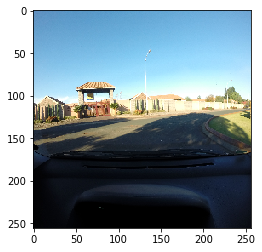

In [37]:
filename = './test/G0010035.jpg'
img = image.load_img(filename, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
plt.imshow(img)
print("The image contains a pothole")
print("Accuracy = ",classes[0][0]*100," %")
imag = cv2.imread(filename)
edges = cv2.Canny(imag,150,300,L2gradient=True)
ret,thresh = cv2.threshold(edges,127,255,0)
im2,cont,hier = cv2.findContours(thresh, 1, 2)
cntlist = []
for cnt in cont:
    if cv2.contourArea(cnt)>50 and cv2.contourArea(cnt)<100:
            if cv2.contourArea(cnt) not in arealist:
                cntlist.append(cnt)
for c in cntlist:
    rect = cv2.minAreaRect(cnt)
    a,b,c = rect
l,w = b
noise = (min(l,w)*0.6)
np.random.seed(int(noise))
depth = np.random.randint(2,8)
print("Number of potholes = "+str(len(cntlist)%10))
print("Depth = "+str(depth)+" cm")